In [1]:
# !pip install lifelines
# !pip install pycox
# !pip install xgbse
# !pip install optuna
# !pip install shap
# !pip install --upgrade ipykernel
# !pip install seaborn
# !pip install sklearn_pandas
# !pip install tableone
# !pip install torch
# !pip install plotly
# !pip install --upgrade survlimepy

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, ElasticNetCV
import os

In [3]:
datapath = './data'
## data
data = pd.read_csv(os.path.join(datapath+'/'+'UTUC_deep.csv'))

savepath = './save/'


In [4]:
data['Pre_WBC'].replace({' ':np.nan},inplace=True)
data['Pre_WBC'] = data['Pre_WBC'].astype(float)
data['Pre_Neu'].replace({' ':np.nan},inplace=True)
data['Pre_Neu'] = data['Pre_Neu'].astype(float)
data['Pre_Lym'].replace({' ':np.nan},inplace=True)
data['Pre_Lym'] = data['Pre_Lym'].astype(float)
data['Pre_Plt'].replace({' ':np.nan},inplace=True)
data['Pre_Plt'] = data['Pre_Plt'].astype(float)
data['Pre_Hb'].replace({' ':np.nan},inplace=True)
data['Pre_Hb'] = data['Pre_Hb'].astype(float)
data['Pre_Crp'].replace({' ':np.nan},inplace=True)
data['Pre_Crp'] = data['Pre_Crp'].astype(float)
data['Pre_alb'].replace({' ':np.nan},inplace=True)
data['Pre_alb'] = data['Pre_alb'].astype(float)
data['Pre_cr'].replace({' ':np.nan},inplace=True)
data['Pre_cr'] = data['Pre_cr'].astype(float)
data['Pre_GFR'].replace({' ':np.nan},inplace=True)
data['Pre_GFR'] = data['Pre_GFR'].astype(float)
data['Pre_CO'].replace({' ':np.nan},inplace=True)
data['Pre_CO'] = data['Pre_CO'].astype(float)


data['Path_N'].replace({' ':np.nan},inplace=True)
data['Path_N'] = data['Path_N'].astype(float)

data['Path_Grade'].replace({' ':np.nan},inplace=True)
data['Path_Grade'] = data['Path_Grade'].astype(float)

data['Path_CIS'].replace({' ':np.nan},inplace=True)
data['Path_CIS'] = data['Path_CIS'].astype(float)

data['Prg'].replace({' ':np.nan},inplace=True)
data['Prg'] = data['Prg'].astype(float)

data['PFS'].replace({' ':np.nan},inplace=True)
data['PFS'] = data['PFS'].astype(float)

data['OS'].replace({' ':np.nan},inplace=True)
data['OS'] = data['OS'].astype(float)

data['REC_B'].replace({' ':np.nan},inplace=True)
data['REC_B'] = data['REC_B'].astype(float)

data['RFS_B'].replace({' ':np.nan},inplace=True)
data['RFS_B'] = data['RFS_B'].astype(float)

data['Location_multiple']=data['Location_Pelvis']+data['Location_Upper']+data['Location_Mid']+data['Location_lower']

In [5]:
raw = data

## 1. Data preprocessing & Missing value exploration

In [6]:
import xgboost as xgb
from tableone import TableOne

In [7]:
data.columns

Index(['ID', 'NAC', 'Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb',
       'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female',
       'BMI', 'DM', 'HTN', 'Location_Pelvis', 'Location_Upper', 'Location_Mid',
       'Location_lower', 'HUN', 'path_T', 'Path_N', 'Path_Grade', 'Path_CIS',
       'OS', 'Surv', 'Prg', 'PFS', 'REC_B', 'RFS_B', 'Location_multiple'],
      dtype='object')

In [8]:
data = data[['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb','NAC',
       'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female',
       'BMI', 'DM', 'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N', 'Path_Grade', 'Path_CIS',
       'Prg', 'PFS', 'OS', 'Surv']]

In [9]:
meta = data.dropna(subset=['Prg','PFS','OS', 'Surv'])

In [10]:
meta['HTN'].replace({2:1},inplace=True)

C:\Users\JUN\AppData\Local\Temp\ipykernel_19944\446701576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta['HTN'].replace({2:1},inplace=True)


In [11]:
table1 = TableOne(meta, dip_test=True, normal_test=True, tukey_test=True)


In [12]:
table1

Missing             Overall
n                                                        677
Pre_WBC, mean (SD)                     0     6956.4 (5467.3)
Pre_Neu, mean (SD)                     0         60.1 (11.0)
Pre_Lym, mean (SD)                     0          29.0 (9.5)
Pre_Plt, mean (SD)                     0  234885.7 (68192.8)
Pre_Hb, mean (SD)                      0          12.7 (1.9)
NAC, n (%)                   0         0          627 (92.6)
                             1                      50 (7.4)
Pre_Crp, mean (SD)                     0           0.8 (2.2)
Pre_alb, mean (SD)                     0           3.8 (0.6)
Pre_cr, mean (SD)                      0           1.1 (0.6)
Pre_GFR, mean (SD)                     0         81.3 (39.7)
Pre_CO, mean (SD)                      1          21.3 (9.9)
Age, mean (SD)                         0         68.4 (10.0)
Female, n (%)                0         0          479 (70.8)
                             1                    198 (29.2)
BMI, mean (SD)                         0         25.1 (12.7)
DM, n (%)                    0         0          514 (75.9)
                             1                    163 (24.1)
HTN, n (%)                   0         0          338 (49.9)
                             1                    339 (50.1)
Location_Pelvis, n (%)       0         0          330 (48.7)
                             1                    347 (51.3)
Location_multiple, mean (SD)           0           1.2 (0.5)
HUN, n (%)                   0         0          316 (46.7)
                             1                    361 (53.3)
path_T, mean (SD)                      0           3.6 (1.4)
Path_N, mean (SD)                    366           0.3 (0.7)
Path_Grade, n (%)            0.0      34           98 (15.2)
                             1.0                  545 (84.8)
Path_CIS, n (%)              0.0      13          391 (58.9)
                             1.0                  273 (41.1)
Prg, n (%)                   0.0       0          495 (73.1)
                             1.0                  182 (26.9)
PFS, mean (SD)                         0         40.9 (30.8)
OS, n (%)                    0.0       0          472 (69.7)
                             1.0                  205 (30.3)
Surv, mean (SD)                        0         45.3 (28.7)
[1] Hartigan's Dip Test reports possible
                                  multimodal distributions for: Pre_alb, Pre_CO, Age, Location_multiple, path_T, Path_N.
[2] Normality test reports non-normal
                                  distributions for: Pre_WBC, Pre_Neu, Pre_Lym, Pre_Plt, Pre_Crp, Pre_alb, Pre_cr, Pre_GFR, Pre_CO, Age, BMI, Location_multiple, path_T, Path_N, PFS, Surv.
[3] Tukey test indicates far outliers
                                  in: Pre_WBC, Pre_Plt, Pre_Crp, Pre_cr, Pre_GFR, Pre_CO, Location_multiple, Path_N.

In [13]:
table1.to_csv(datapath+'/'+'Table1.csv')

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

from pycox.datasets import metabric
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=30, verbose=1)

## data

In [15]:
from xgbse.converters import convert_to_structured
from sklearn.model_selection import train_test_split

c:\Users\JUN\anaconda3\Lib\site-packages\pkg_resources\__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
c:\Users\JUN\anaconda3\Lib\site-packages\pkg_resources\__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('mpl_toolkits')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
c:\Users\JUN\anaconda3\Lib\site-packages\pkg_resources\__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('ruamel')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
c

In [16]:
# from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [17]:
import optuna

In [18]:
print(xgb.__version__)

1.7.6


In [19]:
from scipy import interp
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve,average_precision_score
import shap
from xgbse import XGBSEKaplanNeighbors, XGBSEDebiasedBCE,XGBSEStackedWeibull
from xgbse._kaplan_neighbors import DEFAULT_PARAMS
from xgbse.metrics import concordance_index
import sklearn.datasets
import sklearn.metrics

In [20]:
import xgbse

In [21]:
print(xgbse.__version__)

0.2.3


In [22]:
from xgbse.converters import convert_to_structured,convert_data_to_xgb_format

In [23]:
meta.columns

Index(['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'NAC', 'Pre_Crp',
       'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
       'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T',
       'Path_N', 'Path_Grade', 'Path_CIS', 'Prg', 'PFS', 'OS', 'Surv'],
      dtype='object')

In [24]:
anal = meta[meta['NAC']!=1]
anal = anal.drop(columns=['NAC'])

In [25]:
anal['PFS'].describe()

count    627.000000
mean      41.583732
std       30.754629
min        0.000000
25%       14.000000
50%       36.000000
75%       61.000000
max      121.000000
Name: PFS, dtype: float64

In [26]:
anal[anal['Prg']==1]['PFS'].describe()

count    162.000000
mean      16.913580
std       18.081388
min        0.000000
25%        5.000000
50%       10.000000
75%       23.000000
max      103.000000
Name: PFS, dtype: float64

In [27]:
anal.columns

Index(['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'Pre_Crp',
       'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
       'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T',
       'Path_N', 'Path_Grade', 'Path_CIS', 'Prg', 'PFS', 'OS', 'Surv'],
      dtype='object')

In [28]:
E= anal[['Prg']]

In [29]:
weight = len(E[E==0])/ len(E[E==1])

In [30]:
# X = anal[['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'Pre_Crp',
#        'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
#        'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
#        'Path_Grade', 'Path_CIS']]
# y = anal[['Prg', 'PFS']]

In [31]:
# X = anal[['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'Pre_Crp',
#        'Pre_alb', 'Pre_cr', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
#        'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
#        'Path_Grade', 'Path_CIS']]
# y = anal[['Prg', 'PFS']]

In [32]:

anal['Path_N'].replace({np.nan:0},inplace=True)
anal['Path_N'] = anal['Path_N'].astype(float)
anal['Path_Grade'].replace({np.nan:0},inplace=True)
anal['Path_Grade'] = anal['Path_Grade'].astype(float)
anal['Path_CIS'].replace({np.nan:0},inplace=True)
anal['Path_CIS'] = anal['Path_CIS'].astype(float)

In [33]:
# X = anal[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
#        'Path_Grade']]

X = anal[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
       'Path_Grade', 'Path_CIS']]
y = anal[['Prg', 'PFS','OS', 'Surv']]

In [34]:
# y = convert_to_structured(anal['PFS'], anal['Prg'])

In [35]:
X

,Age,Female,BMI,Pre_GFR,Location_Pelvis,Location_multiple,HUN,path_T,Path_N,Path_Grade,Path_CIS
0,50,0,28.000000,96.106645,1,1,1,3,0.0,0.0,0.0
1,47,0,21.000000,80.307387,1,1,1,2,0.0,1.0,0.0
2,73,0,18.700000,81.768519,0,1,0,4,0.0,0.0,0.0
3,63,0,25.300000,167.463536,1,1,0,5,0.0,1.0,0.0
4,66,0,24.500000,78.081601,1,1,0,2,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
673,58,1,28.700000,63.495450,1,2,0,5,0.0,0.0,0.0
674,66,0,25.900000,133.519537,1,1,0,5,0.0,0.0,0.0
675,71,1,24.600000,46.022233,0,1,0,3,0.0,0.0,0.0
676,58,0,26.100000,128.022534,0,1,1,4,0.0,0.0,0.0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7, stratify=y['Prg'])
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=7,stratify=y_train['Prg'])

In [37]:
y_back = convert_to_structured(y['PFS'], y['Prg'])
y_test_back=y_test.copy()
y_train_back=y_train.copy()
y_valid_back=y_valid.copy()
y_test_pfs = convert_to_structured(y_test['PFS'], y_test['Prg'])
y_train_pfs = convert_to_structured(y_train['PFS'], y_train['Prg'])
y_valid_pfs = convert_to_structured(y_valid['PFS'], y_valid['Prg'])

In [38]:

y_test_os = convert_to_structured(y_test['Surv'], y_test['OS'])
y_train_os = convert_to_structured(y_train['Surv'], y_train['OS'])
y_valid_os = convert_to_structured(y_valid['Surv'], y_valid['OS'])

In [39]:
categorical = ['Female','DM','HTN', 'path_T', 'Path_N','Location_multiple','Location_Pelvis','Path_Grade', 'Path_CIS', 'Prg', 'HUN']

In [40]:
Table_1 = TableOne(meta, dip_test=True, normal_test=True, tukey_test=True,
         nonnormal=['Pre_WBC','Pre_Hb', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'BMI','PFS'],
         categorical=categorical)

In [41]:
Table_1.to_csv(datapath+'/'+'Table1.csv')

In [42]:
Table_1

,,Missing,Overall
n,,,677
"Pre_WBC, median [Q1,Q3]",,0,"6400.0 [5300.0,7700.0]"
"Pre_Neu, median [Q1,Q3]",,0,"60.5 [52.9,67.1]"
"Pre_Lym, median [Q1,Q3]",,0,"28.5 [22.7,35.1]"
"Pre_Plt, median [Q1,Q3]",,0,"232000.0 [193000.0,272000.0]"
"Pre_Hb, median [Q1,Q3]",,0,"12.9 [11.6,14.1]"
"NAC, mean (SD)",,0,0.1 (0.3)
"Pre_Crp, median [Q1,Q3]",,0,"0.1 [0.1,0.4]"
"Pre_alb, median [Q1,Q3]",,0,"3.8 [3.6,4.1]"
"Pre_cr, median [Q1,Q3]",,0,"1.0 [0.8,1.3]"


In [43]:
train_idx = X_train.index
test_idx = X_test.index
valid_idx = X_valid.index

In [44]:
X_train_v = X_train.values
X_test_v = X_test.values
X_valid_v = X_valid.values


In [45]:
meta.loc[train_idx].to_csv(savepath+'/'+'train_data.csv')
meta.loc[test_idx].to_csv(savepath+'/'+'test_data.csv')
meta.loc[valid_idx].to_csv(savepath+'/'+'valid_data.csv')

In [46]:
xgb_train_pfs = convert_data_to_xgb_format(X_train_v,y_train_pfs,'survival:aft')
xgb_valid_pfs = convert_data_to_xgb_format(X_valid_v,y_valid_pfs,'survival:aft')
xgb_test_pfs = convert_data_to_xgb_format(X_test_v,y_test_pfs,'survival:aft')

xgb_train_os = convert_data_to_xgb_format(X_train_v,y_train_os,'survival:aft')
xgb_valid_os = convert_data_to_xgb_format(X_valid_v,y_valid_os,'survival:aft')
xgb_test_os = convert_data_to_xgb_format(X_test_v,y_test_os,'survival:aft')

In [47]:
meta[['Prg', 'PFS']]['PFS'].max()

121.0

In [48]:
TIME_BINS = np.arange(0, 300, 1)
TIME_BINS

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [49]:
from xgbse import XGBSEKaplanTree, XGBSEBootstrapEstimator,XGBSEDebiasedBCE, XGBSEStackedWeibull
from xgbse.metrics import concordance_index, approx_brier_score,dist_calibration_score

In [50]:
# to easily plot confidence intervals
def plot_ci(mean, upper_ci, lower_ci, i=42, title='Probability of survival $P(T \geq t)$'):

    # plotting mean and confidence intervals
    plt.figure(figsize=(12, 4), dpi=120)
    plt.plot(mean.columns,mean.iloc[i])
    plt.fill_between(mean.columns, lower_ci.iloc[i], upper_ci.iloc[i], alpha=0.2)

    plt.title(title)
    plt.xlabel('Time [days]')
    plt.ylabel('Probability')
    plt.tight_layout()


invalid escape sequence '\g'
invalid escape sequence '\g'
invalid escape sequence '\g'


In [51]:
PARAMS_XGB_AFT = {
    'objective': 'survival:aft',
    'eval_metric': 'aft-nloglik',
    'aft_loss_distribution': 'logistic',
    'aft_loss_distribution_scale': 1,
    'tree_method': 'hist',
    'learning_rate': 5e-2,
    'max_depth': 100,
    # 'booster':'dart',
    'min_child_weight': 5
}

PARAMS_LR = {
    'C': 1e-3,
    'max_iter': 2
}


N_NEIGHBORS = 100


In [52]:
def convert_y(y):
    """
    Convert structured array y into an array of
    event indicators (E) and time of events (T).
    Args:
        y (structured array(numpy.bool_, numpy.number)): Binary event indicator as first field,
            and time of event or time of censoring as second field.
    Returns:
        T ([np.array, pd.Series]): Time of events
        E ([np.array, pd.Series]): Binary event indicator
    """
    event_field, time_field = y.dtype.names
    return y[event_field], y[time_field]

In [53]:
y_test

,Prg,PFS,OS,Surv
338,1.0,9.0,1.0,10
29,1.0,3.0,1.0,9
104,0.0,102.0,0.0,102
572,0.0,31.0,0.0,31
354,0.0,23.0,1.0,23
...,...,...,...,...
450,0.0,52.0,0.0,52
581,0.0,31.0,0.0,31
278,0.0,71.0,0.0,71
367,0.0,1.0,1.0,1


In [54]:
E=y_test['Prg']
T=y_test['PFS']

In [55]:
weight = len(E[E==0])/len(E[E==1])

In [56]:
weight

2.9375

## 1 PFS model

In [57]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

kmf.fit(T, E)



<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 63 total observations, 47 right-censored observations>

In [58]:
PARAMS_XGB_AFT

{'objective': 'survival:aft',
 'eval_metric': 'aft-nloglik',
 'aft_loss_distribution': 'logistic',
 'aft_loss_distribution_scale': 1,
 'tree_method': 'hist',
 'learning_rate': 0.05,
 'max_depth': 100,
 'min_child_weight': 5}

In [59]:
base_params = {'verbosity': 0,
              'objective': 'survival:aft',
              'eval_metric': 'aft-nloglik',
              # 'tree_method': 'hist',
              'booster': 'dart',
              'scale_pos_weight': weight
              }  # Hyperparameters common to all trials


def objective(trial):
    params = {'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
              'aft_loss_distribution': trial.suggest_categorical('aft_loss_distribution',
                                                                  ['normal', 'logistic', 'extreme']),
              'aft_loss_distribution_scale': trial.suggest_float('aft_loss_distribution_scale', 0.03,2.0),
              'max_depth': trial.suggest_int('max_depth', 3, 20),
              'lambda': trial.suggest_float('lambda', 1e-3, 1.0),
              'alpha': trial.suggest_float('alpha', 1e-3, 1.0),
              'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),
              'colsample_bynode':trial.suggest_float('colsample_bynode', 0.7, 1),
              'colsample_bytree':trial.suggest_float('colsample_bytree', 0.7, 1),
              'colsample_bylevel':trial.suggest_float('colsample_bylevel', 0.7, 1)

              }  # Search space

    params.update(base_params)
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, 'valid-aft-nloglik')
    bst = xgb.train(params, xgb_train_pfs, num_boost_round=100,
                    evals=[(xgb_train_pfs, 'train'), (xgb_valid_pfs, 'valid')],
                    early_stopping_rounds=10, verbose_eval=False, callbacks=[pruning_callback])
    if bst.best_iteration >= 25:
        return bst.best_score
    else:
        return np.inf  

In [60]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, timeout=10)
print('Completed hyperparameter tuning with best aft-nloglik = {}.'.format(study.best_trial.value))
params = {}
params.update(base_params)
params.update(study.best_trial.params)

[I 2023-10-23 17:38:23,668] A new study created in memory with name: no-name-cbe8fd03-6843-48d6-8214-346f77059e6b
[I 2023-10-23 17:38:25,480] Trial 0 finished with value: 2.2777651880863146 and parameters: {'learning_rate': 0.03225391529063484, 'aft_loss_distribution': 'extreme', 'aft_loss_distribution_scale': 1.5468365752771487, 'max_depth': 14, 'lambda': 0.5308566679469221, 'alpha': 0.8866810509623376, 'min_child_weight': 3.5830321734464463, 'colsample_bynode': 0.7541565749177518, 'colsample_bytree': 0.9829082616637463, 'colsample_bylevel': 0.9737612376835589}. Best is trial 0 with value: 2.2777651880863146.
[I 2023-10-23 17:38:25,518] Trial 1 finished with value: inf and parameters: {'learning_rate': 0.09724057184783536, 'aft_loss_distribution': 'logistic', 'aft_loss_distribution_scale': 0.07874104695642689, 'max_depth': 10, 'lambda': 0.09867312071860458, 'alpha': 0.28782606673733424, 'min_child_weight': 3.8048593535721684, 'colsample_bynode': 0.7241510774399437, 'colsample_bytree':

Completed hyperparameter tuning with best aft-nloglik = 1.8056694111155072.


In [61]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [62]:
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice


plot_intermediate_values(study)


c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [63]:
plot_parallel_coordinate(study)

[W 2023-10-23 17:38:34,422] Trial 1 is omitted in visualization because its objective value is inf or nan.
[W 2023-10-23 17:38:34,422] Trial 4 is omitted in visualization because its objective value is inf or nan.
c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [64]:
params_WB = {
    'penalizer':0.001
}

In [65]:
params

{'verbosity': 0,
 'objective': 'survival:aft',
 'eval_metric': 'aft-nloglik',
 'booster': 'dart',
 'scale_pos_weight': 2.9375,
 'learning_rate': 0.06246547563864933,
 'aft_loss_distribution': 'logistic',
 'aft_loss_distribution_scale': 0.9034707514479228,
 'max_depth': 12,
 'lambda': 0.7601309310204835,
 'alpha': 0.7954397059698787,
 'min_child_weight': 1.6270248408844932,
 'colsample_bynode': 0.9383342222487063,
 'colsample_bytree': 0.8252284388885377,
 'colsample_bylevel': 0.8884076574544147}

In [66]:
# %%time
# base model as XGBSEKaplanTree
# xgbse_model = XGBSEKaplanTree(params)
# xgbse_model_pfs = XGBSEKaplanNeighbors(params, N_NEIGHBORS)
xgbse_model_pfs = XGBSEStackedWeibull(params, params_WB)
# xgbse_model = XGBSEDebiasedBCE(params, PARAMS_LR)

# bootstrap meta estimator
xgbse_model_pfs.fit(X_train, y_train_pfs,
              #  persist_train=True,
                validation_data=(X_valid, y_valid_pfs),
                early_stopping_rounds=10,
                index_id=X.index,
                num_boost_round=100,
                time_bins=TIME_BINS
)


# # # bootstrap meta estimator
bootstrap_estimator_pfs = XGBSEBootstrapEstimator(xgbse_model_pfs, n_estimators=30)
bootstrap_estimator_pfs.fit(
    X_train,
    y_train_pfs,
    validation_data=(X_test, y_test_pfs),
    early_stopping_rounds=10,
    time_bins=TIME_BINS,
)
# mean = xgbse_model.predict(X_test)


# mean_pfs, upper_ci_pfs, lower_ci_pfs = xgbse_model_pfs.predict(X_test, return_ci=True)


# # predicting
mean_pfs, upper_ci_pfs, lower_ci_pfs = bootstrap_estimator_pfs.predict(X_test, return_ci=True)

# print metrics
print(f"C-index: {concordance_index(y_test_pfs, mean_pfs)}")
print(f"Avg. Brier Score: {approx_brier_score(y_test_pfs, mean_pfs)}")
print(f"Calibration Score: {dist_calibration_score(y_test_pfs, mean_pfs)> 0.05}")


C-index: 0.7899045020463847
Avg. Brier Score: 0.04654156694871294
Calibration Score: True


In [67]:
dist_calibration_score(y_test_pfs, mean_pfs)

0.953679000902526

In [68]:
xgbse_model_pfs
# bootstrap_estimator_pfs

XGBSEStackedWeibull(weibull_params={'penalizer': 0.001},
                    xgb_params={'aft_loss_distribution': 'logistic',
                                'aft_loss_distribution_scale': 0.9034707514479228,
                                'alpha': 0.7954397059698787, 'booster': 'dart',
                                'colsample_bylevel': 0.8884076574544147,
                                'colsample_bynode': 0.9383342222487063,
                                'colsample_bytree': 0.8252284388885377,
                                'eval_metric': 'aft-nloglik',
                                'lambda': 0.7601309310204835,
                                'learning_rate': 0.06246547563864933,
                                'max_depth': 12,
                                'min_child_weight': 1.6270248408844932,
                                'objective': 'survival:aft',
                                'scale_pos_weight': 2.9375, 'verbosity': 0})

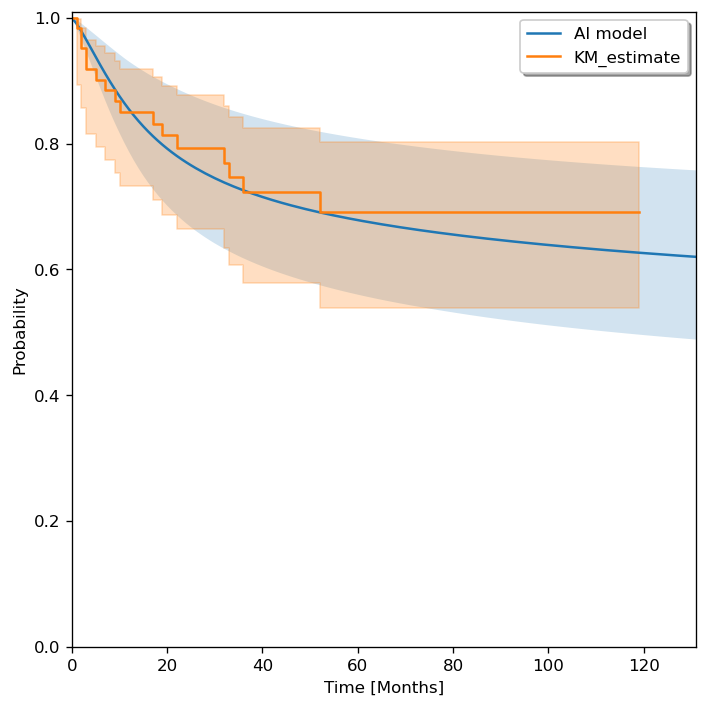

In [69]:
from lifelines.statistics import logrank_test
fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)

# fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
# plt.figure(figsize=(6, 6), dpi=120)

line1, = ax.plot(mean_pfs.columns, mean_pfs.mean(), label="AI model")
line2 = ax.fill_between(mean_pfs.columns, lower_ci_pfs.mean(), upper_ci_pfs.mean(), alpha=0.2)

line3 = kmf.plot_survival_function()


# results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
# for index, row in mean_pfs.iterrows():
#     plt.plot(row.index, row.values, marker='', color='grey', linewidth=0.3, alpha=0.8)

ax.legend(shadow=True)


plt.xlabel('Time [Months]')
plt.ylabel('Probability')
plt.xlim([-0.01, 131])
plt.ylim([0.0, 1.01])
plt.tight_layout()

In [70]:
PRG_test, PFS_test = convert_y(y_test_pfs)

In [71]:
mean_pfs['PRG_test'] = PRG_test

In [72]:
mean_pfs['PFS_test'] = PFS_test

In [73]:
temp = mean_pfs[mean_pfs['PRG_test']==True]

In [74]:
temp['PFS_test'].values

array([ 9.,  3., 19.,  5.,  2., 32., 17.,  1., 22., 36., 10.,  7.,  3.,
       52.,  2., 33.])

In [75]:
# temp['e_proba'] = temp.PFS_test.apply(lambda x: temp[x], print(x))
# temp.PFS_test.apply(lambda x: print(x))

In [76]:
dist_calibration_score(y_test_pfs, mean_pfs, returns="all")

{'statistic': 3.247278546601362,
 'pval': 0.953679000902526,
 'max_deviation': 0.3368728542156837,
 'histogram': bin
 (-0.001, 0.1]    8.227513
 (0.1, 0.2]       6.084075
 (0.2, 0.3]       7.500834
 (0.3, 0.4]       5.944613
 (0.4, 0.5]       4.939259
 (0.5, 0.6]       4.552725
 (0.6, 0.7]       4.177701
 (0.7, 0.8]       5.770185
 (0.8, 0.9]       7.508951
 (0.9, 1.0]       8.294145
 dtype: float64}

In [77]:
predicted_surv = mean_pfs

In [78]:
mean_pfs.mean()

0.0          1.000000
1.0          0.990589
2.0          0.978468
3.0          0.965229
4.0          0.951548
              ...    
297.0        0.568293
298.0        0.568095
299.0        0.567898
PRG_test     0.253968
PFS_test    41.793651
Length: 302, dtype: float64

In [79]:
from bisect import bisect_right
def _match_times_to_windows(times, windows):
    matches = np.array([bisect_right(windows, e) for e in times])
    matches = np.clip(matches, 0, len(windows) - 1)
    return windows[matches]

In [80]:
X_test.loc[29]

Age                   74.000000
Female                 0.000000
BMI                   24.000000
Pre_GFR              118.103476
Location_Pelvis        1.000000
Location_multiple      2.000000
HUN                    1.000000
path_T                 5.000000
Path_N                 2.000000
Path_Grade             1.000000
Path_CIS               0.000000
Name: 29, dtype: float64

In [81]:
y_test_back[y_test_back['Prg']==1]

,Prg,PFS,OS,Surv
338,1.0,9.0,1.0,10
29,1.0,3.0,1.0,9
390,1.0,19.0,0.0,38
120,1.0,5.0,1.0,9
170,1.0,2.0,1.0,4
305,1.0,32.0,1.0,35
634,1.0,17.0,0.0,17
492,1.0,1.0,1.0,4
557,1.0,22.0,0.0,30
105,1.0,36.0,1.0,43


In [82]:
mean_pfs.set_index(keys =y_test_back.index, inplace=True )
upper_ci_pfs.set_index(keys =y_test_back.index, inplace=True )
lower_ci_pfs.set_index(keys =y_test_back.index, inplace=True )

In [83]:
# mean_1 = xgbse_model.predict(X_train, return_ci=False)
mean_1_pfs = bootstrap_estimator_pfs.predict(X_train)
print(f"C-index: {concordance_index(y_train_pfs, mean_1_pfs)}")

C-index: 0.8893702301666025


In [84]:
# mean_2 = xgbse_model.predict(X_valid, return_ci=False)
mean_2_pfs = bootstrap_estimator_pfs.predict(X_valid)
print(f"C-index: {concordance_index(y_valid_pfs, mean_2_pfs)}")

C-index: 0.8262987012987013


##2. OS

In [85]:
E_2=y_test['OS']
T_2=y_test['Surv']

In [86]:
y_test

,Prg,PFS,OS,Surv
338,1.0,9.0,1.0,10
29,1.0,3.0,1.0,9
104,0.0,102.0,0.0,102
572,0.0,31.0,0.0,31
354,0.0,23.0,1.0,23
...,...,...,...,...
450,0.0,52.0,0.0,52
581,0.0,31.0,0.0,31
278,0.0,71.0,0.0,71
367,0.0,1.0,1.0,1


In [87]:
weight_2 = len(E_2[E_2==0])/len(E_2[E_2==1])

In [88]:
weight_2

1.8636363636363635

In [89]:
from lifelines import KaplanMeierFitter
kmf_os = KaplanMeierFitter()

kmf_os.fit(T_2, E_2)



<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 63 total observations, 41 right-censored observations>

In [90]:
base_params = {'verbosity': 0,
              'objective': 'survival:aft',
              'eval_metric': 'aft-nloglik',
              'tree_method': 'hist',
              # 'booster': 'dart',
              'scale_pos_weight': weight_2
              }  # Hyperparameters common to all trials



def objective(trial):
    params = {'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
              'aft_loss_distribution': trial.suggest_categorical('aft_loss_distribution',
                                                                  ['normal', 'logistic', 'extreme']),
              'aft_loss_distribution_scale': trial.suggest_float('aft_loss_distribution_scale', 0.3,2.0),
              'max_depth': trial.suggest_int('max_depth', 3, 20),
              'lambda': trial.suggest_float('lambda', 1e-3, 1.0),
              'alpha': trial.suggest_float('alpha', 1e-3, 1.0),
              'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),
              'colsample_bynode':trial.suggest_float('colsample_bynode', 0.7, 1),
              'colsample_bytree':trial.suggest_float('colsample_bytree', 0.7, 1),
              'colsample_bylevel':trial.suggest_float('colsample_bylevel', 0.7, 1)

              }  # Search space

    params.update(base_params)
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, 'valid-aft-nloglik')
    bst = xgb.train(params, xgb_train_os, num_boost_round=100,
                    evals=[(xgb_train_os, 'train'), (xgb_valid_os, 'valid')],
                    early_stopping_rounds=100, verbose_eval=False, callbacks=[pruning_callback])
    if bst.best_iteration >= 25:
        return bst.best_score
    else:
        return np.inf  # Reject models with < 25 trees

In [91]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, timeout=10)
print('Completed hyperparameter tuning with best aft-nloglik = {}.'.format(study.best_trial.value))
params = {}
params.update(base_params)
params.update(study.best_trial.params)

[I 2023-10-23 17:39:04,774] A new study created in memory with name: no-name-ad57abfc-d661-4333-8884-b69c1b2f221f
[I 2023-10-23 17:39:04,862] Trial 0 finished with value: inf and parameters: {'learning_rate': 0.07252425528218354, 'aft_loss_distribution': 'logistic', 'aft_loss_distribution_scale': 0.43073567690666426, 'max_depth': 5, 'lambda': 0.8841670445795803, 'alpha': 0.5614297669950734, 'min_child_weight': 1.4851717897630197, 'colsample_bynode': 0.8518986978843133, 'colsample_bytree': 0.9323434635821832, 'colsample_bylevel': 0.8727952277462299}. Best is trial 0 with value: inf.
[I 2023-10-23 17:39:04,977] Trial 1 finished with value: 2.09706809211248 and parameters: {'learning_rate': 0.05642972522360387, 'aft_loss_distribution': 'extreme', 'aft_loss_distribution_scale': 1.723090766129763, 'max_depth': 7, 'lambda': 0.23177724828977386, 'alpha': 0.053852730429101686, 'min_child_weight': 6.52073984277848, 'colsample_bynode': 0.7155500519856774, 'colsample_bytree': 0.9054544110090997, 

Completed hyperparameter tuning with best aft-nloglik = 1.9573779681279826.


In [92]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [93]:
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice


plot_intermediate_values(study)


c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [94]:
plot_parallel_coordinate(study)

[W 2023-10-23 17:39:15,126] Trial 0 is omitted in visualization because its objective value is inf or nan.
[W 2023-10-23 17:39:15,127] Trial 7 is omitted in visualization because its objective value is inf or nan.
c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [95]:
params

{'verbosity': 0,
 'objective': 'survival:aft',
 'eval_metric': 'aft-nloglik',
 'tree_method': 'hist',
 'scale_pos_weight': 1.8636363636363635,
 'learning_rate': 0.04511417356225397,
 'aft_loss_distribution': 'logistic',
 'aft_loss_distribution_scale': 0.7265357574020433,
 'max_depth': 9,
 'lambda': 0.2126326521286263,
 'alpha': 0.07648048892492666,
 'min_child_weight': 7.053774055267383,
 'colsample_bynode': 0.8455485195376221,
 'colsample_bytree': 0.7432365317141608,
 'colsample_bylevel': 0.7411463082939529}

In [96]:
# %%time

# base model as XGBSEKaplanTree
# xgbse_model = XGBSEKaplanTree(params)
# xgbse_model = XGBSEKaplanNeighbors(params, N_NEIGHBORS)
xgbse_model_os = XGBSEStackedWeibull(params, params_WB)
# xgbse_model = XGBSEDebiasedBCE(params, PARAMS_LR)

# bootstrap meta estimator
xgbse_model_os.fit(X_train, y_train_os,
              #  persist_train=True,
                validation_data=(X_valid, y_valid_os),
                early_stopping_rounds=50,
                index_id=X.index,
                num_boost_round=1000,
                time_bins=TIME_BINS
)


# # # bootstrap meta estimator
bootstrap_estimator_os = XGBSEBootstrapEstimator(xgbse_model_os, n_estimators=30)
bootstrap_estimator_os.fit(
    X_train,
    y_train_os,
    validation_data=(X_test, y_test_os),
    early_stopping_rounds=10,
    time_bins=TIME_BINS,
)
# mean = xgbse_model.predict(X_test)


# mean, upper_ci, lower_ci = xgbse_model.predict(X_test, return_ci=True)


# # predicting
mean_os, upper_ci_os, lower_ci_os = bootstrap_estimator_os.predict(X_test, return_ci=True)

# print metrics
print(f"C-index: {concordance_index(y_test_os, mean_os)}")
print(f"Avg. Brier Score: {approx_brier_score(y_test_os, mean_os)}")
print(f"Calibration Score: {dist_calibration_score(y_test_os, mean_os)> 0.05}")


c:\Users\JUN\anaconda3\Lib\site-packages\lifelines\fitters\__init__.py:2075: ApproximationWarning:

The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `WeibullAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.


c:\Users\JUN\anaconda3\Lib\site-packages\lifelines\fitters\__init__.py:2

C-index: 0.8099447513812155
Avg. Brier Score: 0.04713933220529623
Calibration Score: True


In [97]:
dist_calibration_score(y_test_os, mean_os)

0.7744793298172417

In [98]:
bootstrap_estimator_os

XGBSEBootstrapEstimator(base_estimator=XGBSEStackedWeibull(weibull_params={'penalizer': 0.001},
                                                           xgb_params={'aft_loss_distribution': 'logistic',
                                                                       'aft_loss_distribution_scale': 0.7265357574020433,
                                                                       'alpha': 0.07648048892492666,
                                                                       'colsample_bylevel': 0.7411463082939529,
                                                                       'colsample_bynode': 0.8455485195376221,
                                                                       'colsample_bytree': 0.7432365317141608,
                                                                       'eval_metric': 'aft-nloglik',
                                                                       'lambda': 0.2126326521286263,
                                                                       'learning_rate': 0.04511417356225397,
                                                                       'max_depth': 9,
                                                                       'min_child_weight': 7.053774055267383,
                                                                       'objective': 'survival:aft',
                                                                       'scale_pos_weight': 1.8636363636363635,
                                                                       'tree_method': 'hist',
                                                                       'verbosity': 0}),
                        n_estimators=30)

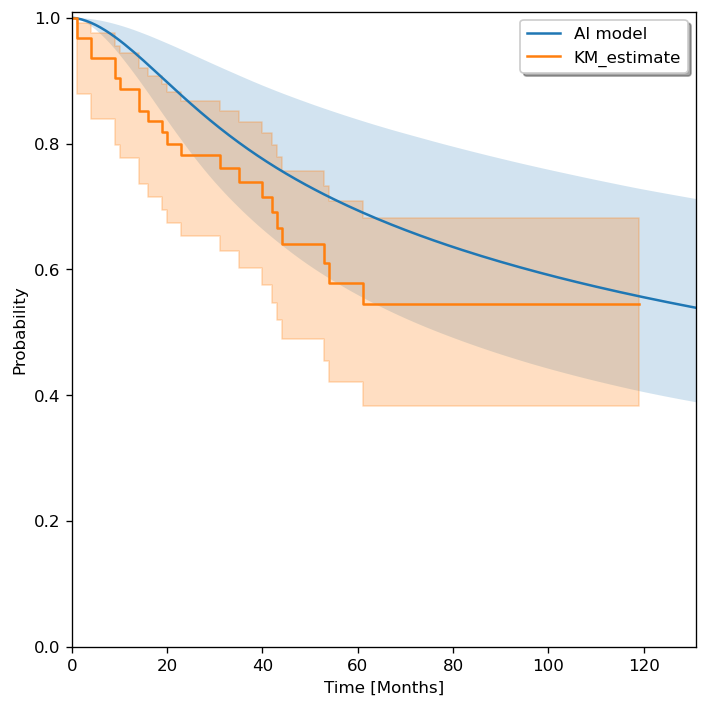

In [99]:
from lifelines.statistics import logrank_test
fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)

# fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
# plt.figure(figsize=(6, 6), dpi=120)



line1, = ax.plot(mean_os.columns, mean_os.mean(), label="AI model")
line2 = ax.fill_between(mean_os.columns, lower_ci_os.mean(), upper_ci_os.mean(), alpha=0.2)


line3 = kmf_os.plot_survival_function()


# results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)


ax.legend(shadow=True)


plt.xlabel('Time [Months]')
plt.ylabel('Probability')
plt.xlim([-0.01, 131])
plt.ylim([0.0, 1.01])
plt.tight_layout()

In [100]:
dist_calibration_score(y_test_os, mean_os, returns="all")

{'statistic': 5.648888796807445,
 'pval': 0.7744793298172417,
 'max_deviation': 0.6936961749982966,
 'histogram': bin
 (-0.001, 0.1]     4.933040
 (0.1, 0.2]        4.933040
 (0.2, 0.3]        6.933040
 (0.3, 0.4]        4.806014
 (0.4, 0.5]        5.401283
 (0.5, 0.6]        6.275146
 (0.6, 0.7]        4.019842
 (0.7, 0.8]        6.751617
 (0.8, 0.9]        8.276693
 (0.9, 1.0]       10.670286
 dtype: float64}

In [101]:
predicted_surv = mean_os

In [102]:
mean_os.mean()

0.0      1.000000
1.0      0.999171
2.0      0.997494
3.0      0.995130
4.0      0.992151
           ...   
295.0    0.403010
296.0    0.402543
297.0    0.402078
298.0    0.401616
299.0    0.401156
Length: 300, dtype: float64

In [103]:
X_test.loc[29]

Age                   74.000000
Female                 0.000000
BMI                   24.000000
Pre_GFR              118.103476
Location_Pelvis        1.000000
Location_multiple      2.000000
HUN                    1.000000
path_T                 5.000000
Path_N                 2.000000
Path_Grade             1.000000
Path_CIS               0.000000
Name: 29, dtype: float64

In [104]:
y_test_back[y_test_back['Prg']==1]

,Prg,PFS,OS,Surv
338,1.0,9.0,1.0,10
29,1.0,3.0,1.0,9
390,1.0,19.0,0.0,38
120,1.0,5.0,1.0,9
170,1.0,2.0,1.0,4
305,1.0,32.0,1.0,35
634,1.0,17.0,0.0,17
492,1.0,1.0,1.0,4
557,1.0,22.0,0.0,30
105,1.0,36.0,1.0,43


In [105]:
mean_os.set_index(keys =y_test_back.index, inplace=True )
upper_ci_os.set_index(keys =y_test_back.index, inplace=True )
lower_ci_os.set_index(keys =y_test_back.index, inplace=True )

In [106]:
# mean_1 = xgbse_model.predict(X_train, return_ci=False)
mean_1_os = bootstrap_estimator_os.predict(X_train)
print(f"C-index: {concordance_index(y_train_os, mean_1_os)}")

C-index: 0.8536924605364831


In [107]:
# mean_2 = xgbse_model.predict(X_valid, return_ci=False)
mean_2_os = bootstrap_estimator_os.predict(X_valid)
print(f"C-index: {concordance_index(y_valid_os, mean_2_os)}")

C-index: 0.7614942528735632


##3. Save

In [108]:
import pickle

# 모델 저장
pickle.dump(bootstrap_estimator_os, open(savepath+'UTUC_CSS.pkl', 'wb'))

In [109]:

pickle.dump(bootstrap_estimator_pfs, open(savepath+'UTUC_PFS.pkl', 'wb'))

In [110]:
savepath

'./save/'

In [111]:
import pickle

In [112]:
import lime
import lime.lime_tabular

In [113]:
from traitlets.config import validate
# Re-run training with the best hyperparameter combination
print('Re-running the best trial... params = {}'.format(params))

xgb_model_pfs = xgb.train(
            params,
            xgb_train_pfs,
            # maximize=True,
            evals= [(xgb_valid_pfs, 'eval')],
            num_boost_round=1000,
            early_stopping_rounds=100,
            verbose_eval=10
)

Re-running the best trial... params = {'verbosity': 0, 'objective': 'survival:aft', 'eval_metric': 'aft-nloglik', 'tree_method': 'hist', 'scale_pos_weight': 1.8636363636363635, 'learning_rate': 0.04511417356225397, 'aft_loss_distribution': 'logistic', 'aft_loss_distribution_scale': 0.7265357574020433, 'max_depth': 9, 'lambda': 0.2126326521286263, 'alpha': 0.07648048892492666, 'min_child_weight': 7.053774055267383, 'colsample_bynode': 0.8455485195376221, 'colsample_bytree': 0.7432365317141608, 'colsample_bylevel': 0.7411463082939529}
[0]	eval-aft-nloglik:4.27487
[10]	eval-aft-nloglik:2.52305
[20]	eval-aft-nloglik:2.14120
[30]	eval-aft-nloglik:1.97914
[40]	eval-aft-nloglik:1.90258
[50]	eval-aft-nloglik:1.85756
[60]	eval-aft-nloglik:1.83313
[70]	eval-aft-nloglik:1.82844
[80]	eval-aft-nloglik:1.82248
[90]	eval-aft-nloglik:1.82028
[100]	eval-aft-nloglik:1.81960
[110]	eval-aft-nloglik:1.81942
[120]	eval-aft-nloglik:1.81829
[130]	eval-aft-nloglik:1.81385
[140]	eval-aft-nloglik:1.81167
[150]	e

In [114]:
from lifelines.utils import concordance_index as cindex

preds = xgb_model_pfs.predict(xgb_test_pfs).astype(float)
T = meta['PFS'][test_idx]
E = meta['Prg'][test_idx]
cind = cindex(T, preds , E)
print(f"C-index: {cind:.3f}")
print(f"Average survival time: {preds.mean():.0f} Months")

C-index: 0.738
Average survival time: 368 Months


In [115]:
preds_2 = xgb_model_pfs.predict(xgb_train_pfs).astype(float)
T_2 = meta['PFS'][train_idx]
E_2 = meta['Prg'][train_idx]
cind_2 = cindex(T_2, preds_2, E_2)

preds_3 = xgb_model_pfs.predict(xgb_valid_pfs).astype(float)
T_3 = meta['PFS'][valid_idx]
E_3 = meta['Prg'][valid_idx]
cind_3 = cindex(T_3, preds_3, E_3)

print (cind_2, cind_3)

0.9661234647186321 0.8381410256410257


In [116]:
X.columns

Index(['Age', 'Female', 'BMI', 'Pre_GFR', 'Location_Pelvis',
       'Location_multiple', 'HUN', 'path_T', 'Path_N', 'Path_Grade',
       'Path_CIS'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

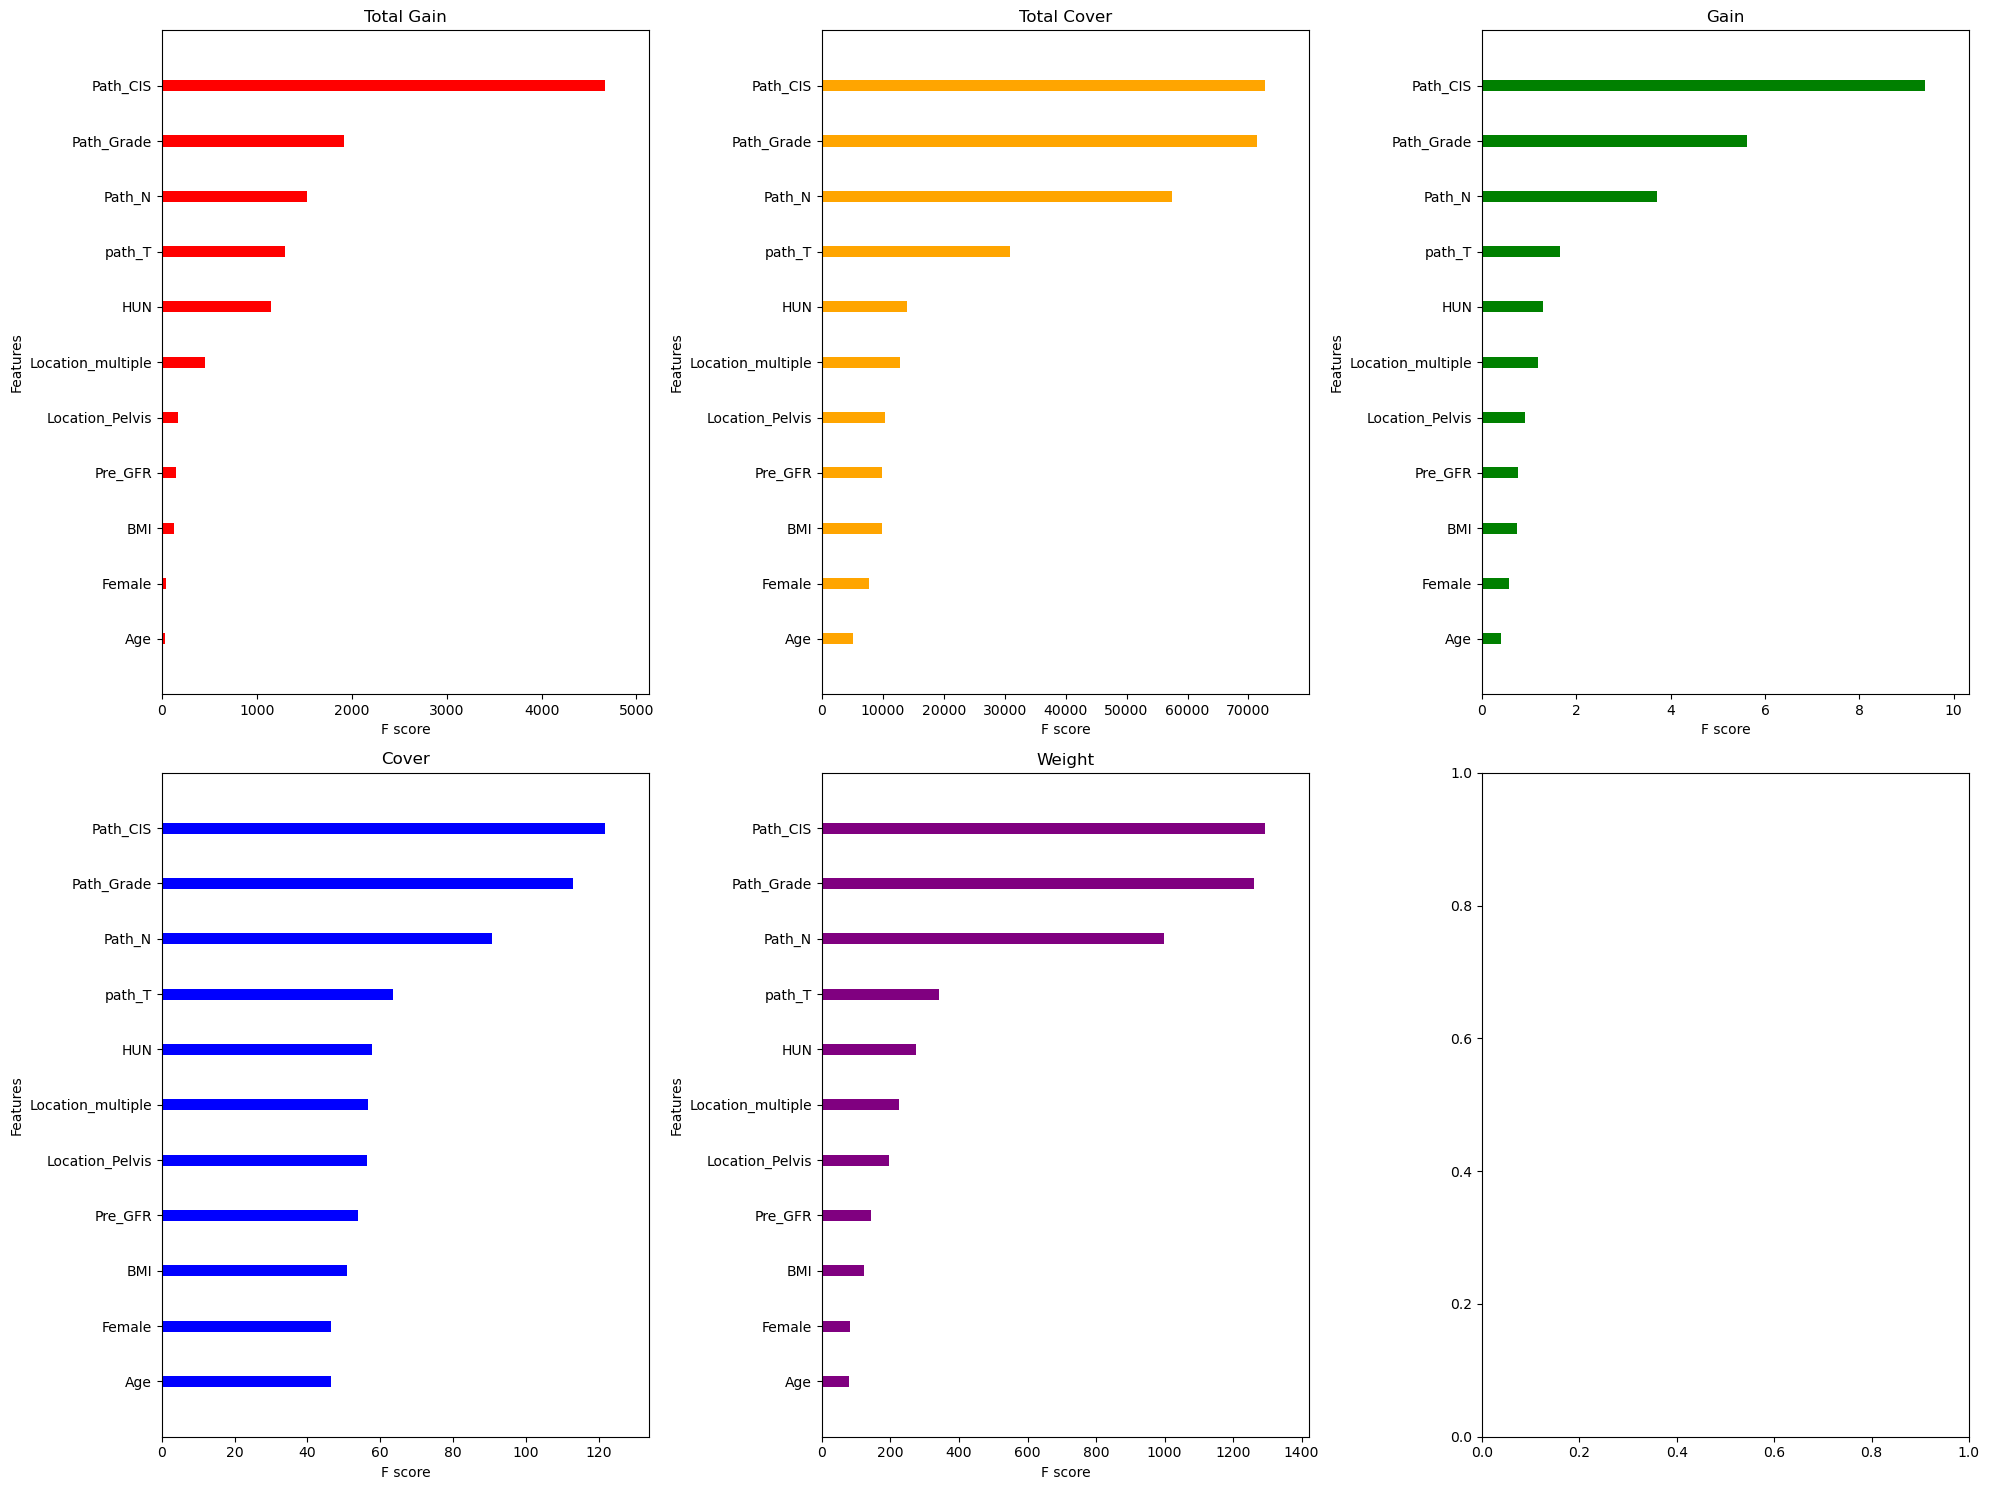

In [117]:
from xgboost import plot_importance

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

axes = [ax for row_axes in axes for ax in row_axes]

plot_importance(xgb_model_pfs,importance_type='total_gain', title='Total Gain', grid=False, ax=axes[0], color='red',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model_pfs,importance_type='total_cover', title='Total Cover', grid=False, ax=axes[1] ,color='orange',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model_pfs,importance_type='gain', title='Gain', grid=False, ax=axes[2], color='green',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model_pfs,importance_type='cover', title='Cover', grid=False, ax=axes[3], color='blue',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model_pfs,importance_type='weight', title='Weight', grid=False, ax=axes[4], color='purple',show_values=False).set_yticklabels(X.columns)

plt.tight_layout()
plt
plt.show


In [118]:
import lime
import lime.lime_tabular

# explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X.columns, class_names=['Progression'], verbose=True, mode='regression')

In [119]:

## kernel shap sends data as numpy array which has no column names, so we fix it
## source: https://gist.github.com/noleto/05dfa4a691ebbc8816c035b86d2d00d4#file-shap_xgboost-py-L46
columns = X_train.columns

def xgbse_predict(data_asarray):
    data_asframe =  pd.DataFrame(data_asarray, columns=columns)
    return bootstrap_estimator_pfs.predict(data_asframe)

In [120]:
import shap

In [121]:

## kernel shap sends data as numpy array which has no column names, so we fix it
## source: https://gist.github.com/noleto/05dfa4a691ebbc8816c035b86d2d00d4#file-shap_xgboost-py-L46

#### Kernel SHAP
shap_kernel_explainer = shap.KernelExplainer(xgbse_predict, X_train.head(30))

# Explain a single instance - output: (1, n_time_buckets, n_features)
shap_one = shap_kernel_explainer.shap_values(X_train.iloc[0])

# Get explanations for the first time bucket
first_time_bucket_shap_values = pd.Series(shap_one[0])

# Print shap values for the first time bucket and the corresponding features
print(pd.concat([first_time_bucket_shap_values, pd.Series(columns)], axis=1))

      0                  1
0   0.0                Age
1   0.0             Female
2   0.0                BMI
3   0.0            Pre_GFR
4   0.0    Location_Pelvis
5   0.0  Location_multiple
6   0.0                HUN
7   0.0             path_T
8   0.0             Path_N
9   0.0         Path_Grade
10  0.0           Path_CIS


In [122]:
# shap_one = shap_kernel_explainer.shap_values(X_train)

In [123]:

# #### Kernel SHAP


# # Explain a single instance - output: (1, n_time_buckets, n_features)
# shap_one = shap_kernel_explainer.shap_values(X_train.iloc[0])

# # Get explanations for the first time bucket
# first_time_bucket_shap_values = pd.Series(shap_one[0])

# # Print shap values for the first time bucket and the corresponding features
# print(pd.concat([first_time_bucket_shap_values, pd.Series(columns)], axis=1))

In [124]:
# shap.summary_plot(first_time_bucket_shap_values, X_train)

In [125]:
ext_1 = pd.read_csv(os.path.join(datapath+'/'+'UTUC_deep_SNU.csv'))
ext_2 = pd.read_csv(os.path.join(datapath+'/'+'UTUC_deep_Hallym.csv'))

In [126]:
ext_1['Pre_GFR'].replace({' ':np.nan},inplace=True)
ext_1['Pre_GFR'] = ext_1['Pre_GFR'].astype(float)

ext_1['Path_N'].replace({' ':np.nan},inplace=True)
ext_1['Path_N'].replace({'N2':1},inplace=True)
ext_1['Path_N'] = ext_1['Path_N'].astype(float)

ext_1['Path_Grade'].replace({' ':np.nan},inplace=True)
ext_1['Path_Grade'] = ext_1['Path_Grade'].astype(float)

ext_1['Path_CIS'].replace({' ':np.nan},inplace=True)
ext_1['Path_CIS'] = ext_1['Path_CIS'].astype(float)

ext_1['Prg'].replace({' ':np.nan},inplace=True)
ext_1['Prg'] = ext_1['Prg'].astype(float)

ext_1['PFS'].replace({' ':np.nan},inplace=True)
ext_1['PFS'] = ext_1['PFS'].astype(float)

ext_1['OS'].replace({' ':np.nan},inplace=True)
ext_1['OS'] = ext_1['OS'].astype(float)

In [127]:
ext_1 = ext_1.dropna(subset=['Prg','PFS','OS', 'Surv','path_T'])
ext_2 = ext_2.dropna(subset=['Prg','PFS','OS', 'Surv',])

In [128]:
# X_snu = ext_1[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
#        'Path_Grade']]
X_snu = ext_1[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
       'Path_Grade', 'Path_CIS']]
y_snu = ext_1[['Prg', 'PFS','OS', 'Surv']]

In [129]:
X_snu.describe()

,Age,Female,BMI,Pre_GFR,Location_Pelvis,Location_multiple,HUN,path_T,Path_N,Path_Grade,Path_CIS
count,238.000000,238.000000,238.000000,236.000000,238.000000,238.000000,237.000000,238.000000,237.000000,227.000000,237.000000
mean,69.462185,0.302521,24.784034,61.981780,0.453782,0.138655,0.489451,3.466387,0.029536,0.837004,0.291139
std,9.774495,0.460318,3.186853,21.199445,0.498908,0.346315,0.500947,1.352028,0.169661,0.370178,0.455249
min,41.000000,0.000000,15.500000,4.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.250000,0.000000,22.800000,49.075000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,71.000000,0.000000,24.650000,60.700000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000
75%,76.000000,1.000000,26.400000,78.050000,1.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000
max,94.000000,1.000000,40.900000,120.800000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000


In [130]:
# X_Hallym = ext_1[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N','Path_Grade']]
X_Hallym = ext_2[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N','Path_Grade',"Path_CIS"]]
y_Hallym = ext_2[['Prg', 'PFS','OS', 'Surv']]


In [131]:

# mean_snu, upper_ci_snu, lower_ci_snu = bootstrap_estimator_pfs.predict(X_snu.iloc[[0]], return_ci=True)

In [132]:
y_snu_anal_pfs = convert_to_structured(y_snu['PFS'], y_snu['Prg'])
y_snu_anal_os = convert_to_structured(y_snu['Surv'], y_snu['OS'])

y_Hallym_anal_pfs = convert_to_structured(y_Hallym['PFS'], y_Hallym['Prg'])
y_Hallym_anal_os = convert_to_structured(y_Hallym['Surv'], y_Hallym['OS'])

In [133]:
# %%time
# mean_snu = xgbse_model.predict(X_snu)

mean_snu_pfs, upper_ci_snu_pfs, lower_ci_snu_pfs = bootstrap_estimator_pfs.predict(X_snu, return_ci=True)
mean_snu_os, upper_ci_snu_os, lower_ci_snu_os = bootstrap_estimator_os.predict(X_snu, return_ci=True)


# # predicting
# mean, upper_ci, lower_ci = bootstrap_estimator.predict(X_test, return_ci=True)

# print metrics
print(f"C-index: {concordance_index(y_snu_anal_pfs, mean_snu_pfs)}")
print(f"Avg. Brier Score: {approx_brier_score(y_snu_anal_pfs, mean_snu_pfs)}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal_pfs, mean_snu_pfs)> 0.05}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal_pfs, mean_snu_pfs)}")

C-index: 0.7250874125874126
Avg. Brier Score: 0.01908410909782262
Calibration Score: True
Calibration Score: 0.867294837024164


In [134]:
print(f"C-index: {concordance_index(y_snu_anal_os, mean_snu_os)}")
print(f"Avg. Brier Score: {approx_brier_score(y_snu_anal_os, mean_snu_os)}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal_os, mean_snu_os)> 0.05}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal_os, mean_snu_os)}")

C-index: 0.7570621468926554
Avg. Brier Score: 0.004603085630809439
Calibration Score: True
Calibration Score: 0.9929979750098342


In [135]:
# %%time
# mean_snu = xgbse_model.predict(X_snu)

mean_Hallym_pfs, upper_ci_Hallym_pfs, lower_ci_Hallym_pfs = bootstrap_estimator_pfs.predict(X_Hallym, return_ci=True)
mean_Hallym_os, upper_ci_Hallym_os, lower_ci_Hallym_os = bootstrap_estimator_os.predict(X_Hallym, return_ci=True)


# # predicting
# mean, upper_ci, lower_ci = bootstrap_estimator.predict(X_test, return_ci=True)

# print metrics
print(f"C-index: {concordance_index(y_Hallym_anal_pfs, mean_Hallym_pfs)}")
print(f"Avg. Brier Score: {approx_brier_score(y_Hallym_anal_pfs, mean_Hallym_pfs)}")
print(f"Calibration Score: {dist_calibration_score(y_Hallym_anal_pfs, mean_Hallym_pfs)> 0.05}")
print(f"Calibration Score: {dist_calibration_score(y_Hallym_anal_pfs, mean_Hallym_pfs)}")

C-index: 0.7242437527400263
Avg. Brier Score: 0.09529507751750749
Calibration Score: False
Calibration Score: 0.035974181495993074


In [136]:
print(f"C-index: {concordance_index(y_Hallym_anal_os, mean_Hallym_os)}")
print(f"Avg. Brier Score: {approx_brier_score(y_Hallym_anal_os, mean_Hallym_os)}")
print(f"Calibration Score: {dist_calibration_score(y_Hallym_anal_os, mean_Hallym_os)> 0.05}")
print(f"Calibration Score: {dist_calibration_score(y_Hallym_anal_os, mean_Hallym_os)}")

C-index: 0.7456059204440333
Avg. Brier Score: 0.06354110864155565
Calibration Score: True
Calibration Score: 0.24554662700625646


In [137]:
tt = ext_1['PFS'].max()
print(tt)

44.7


In [138]:
# mean_snu = mean_snu.loc[:,0:tt]

# upper_ci_snu = upper_ci_snu.loc[:,0:tt]
# lower_ci_snu = lower_ci_snu.loc[:,0:tt]

In [139]:
E_snu, T_snu  = convert_y(y_snu_anal_pfs)
E_snu, T_snu  = convert_y(y_snu_anal_pfs)

In [140]:
from lifelines import KaplanMeierFitter
kmf_2 = KaplanMeierFitter()

kmf_2.fit(T_snu, E_snu)



<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 238 total observations, 205 right-censored observations>

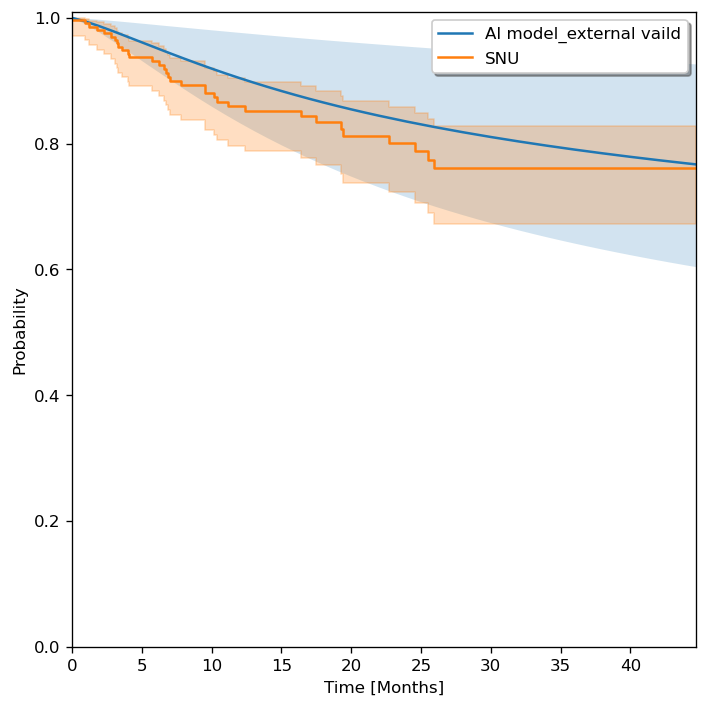

In [141]:
from lifelines.statistics import logrank_test
fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)

# fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
# plt.figure(figsize=(6, 6), dpi=120)



line1, = ax.plot(mean_snu_pfs.columns, mean_snu_pfs.mean(), label="AI model_external vaild")
line2 = ax.fill_between(mean_snu_pfs.columns, lower_ci_snu_pfs.mean(), upper_ci_snu_pfs.mean(), alpha=0.2)

line3 = kmf_2.plot_survival_function(label='SNU')
# line4 = kmf_3.plot_survival_function(label='SNU')


# results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)


ax.legend(shadow=True)


plt.xlabel('Time [Months]')
plt.ylabel('Probability')
plt.xlim([-0.01, tt])
plt.ylim([0.0, 1.01])
plt.tight_layout()